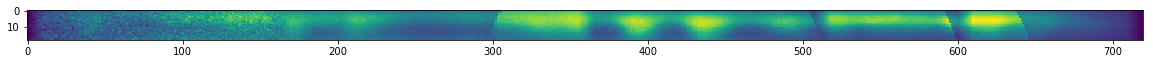

In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
data = np.flip(fits.open("../fits/2017jan_neb.fits")[0].data, 0)
plt.figure(figsize=(20, 1))
plt.imshow(data)
plt.show()

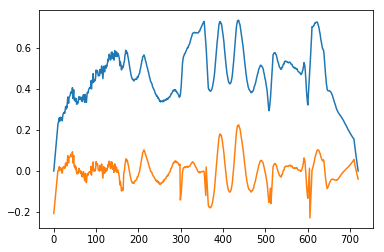

In [8]:
from scipy.signal import detrend
avg = np.mean(data, 0)
lon = np.arange(len(avg))
plt.plot(lon, avg)
avg_detrended = detrend(avg, bp = [0, 165, 299, 360, 513, 605]) #pixels where separate cmaps meet
plt.plot(lon, avg_detrended)
plt.show()

In [11]:
from scipy import fft
print("FFT")
avg_pseries = fft(avg)
xf = np.arange(len(avg)//2)
print('Non-detrended:')
print(720 / len(avg) * np.flip(np.argsort(avg_pseries[0:len(avg)//2]))[:10])

avg_detrended_pseries = fft(avg_detrended)
print('Detrended:')
print(720 / len(avg_detrended) * np.flip(np.argsort(avg_detrended_pseries[0:len(avg_detrended)//2]))[:10])

FFT
Non-detrended:
[ 0. 13. 15.  7. 33. 16. 22. 18. 20. 50.]
Detrended:
[13. 15.  5.  7. 16. 22. 18. 20. 33. 61.]


In [12]:
from astropy.timeseries import LombScargle
print("Lomb-Scargle periodogram")
lon_normed = lon/len(lon)
frequency, power = LombScargle(lon_normed,avg).autopower()
print("Non-detrended:")
print(720 / len(lon) * frequency[np.flip(np.argsort(power[0:len(frequency)//20]))][:10])

detrended_frequency, detrended_power = LombScargle(lon_normed,avg_detrended).autopower()
print("Non-detrended:")
print(720 / len(lon) * detrended_frequency[np.flip(np.argsort(detrended_power[0:len(detrended_frequency)//20]))][:10])

Lomb-Scargle periodogram
Non-detrended:
[3.30458971 3.10431154 0.10013908 0.30041725 0.50069541 0.70097357
 0.90125174 3.50486787 2.90403338 1.1015299 ]
Non-detrended:
[15.92211405 15.72183588 16.12239221 12.31710709 12.11682893 15.52155772
 16.32267038 14.31988873 12.51738526 14.5201669 ]


In [13]:
720 / len(avg_detrended) * np.flip(np.argsort(avg_detrended_pseries[0:len(avg_detrended)//2]))[:10]

array([13., 15.,  5.,  7., 16., 22., 18., 20., 33., 61.])